# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 10

## Problem 1a-e

I went to the website: http://earthref.org/doi/10.1002/2016GC006307
and downloaded the data file.  I put that into something called _Chapter_10/Problem_1_ in my working folder.   

In [1]:
import pmagpy.ipmag as ipmag
help(ipmag.download_magic)

Help on function download_magic in module pmagpy.ipmag:

download_magic(infile, dir_path='.', input_dir_path='.', overwrite=False, print_progress=True, data_model=3.0, separate_locs=False)
    takes the name of a text file downloaded from the MagIC database and
    unpacks it into magic-formatted files. by default, download_magic assumes
    that you are doing everything in your current directory. if not, you may
    provide optional arguments dir_path (where you want the results to go) and
    input_dir_path (where the downloaded file is).
    
    Parameters
    ----------
    infile : str
        MagIC-format file to unpack
    dir_path : str
        output directory (default ".")
    input_dir : str
        input directory (default ".")
    overwrite: bool
        overwrite current directory (default False)
    print_progress: bool
        verbose output (default True)
    data_model : float
        MagIC data model 2.5 or 3 (default 3)
    separate_locs : bool
        create a sep

Now I need to unpack it with **ipmag.download_magic()**.  But first I made a working directory named 'Myfiles'. 

In [73]:
ipmag.download_magic('magic_contribution_12848.txt',dir_path='Chapter_10/Myfiles',input_dir_path='Chapter_10/Problem_1',print_progress=False)

1  records written to file  Chapter_10/Myfiles/contribution.txt
8  records written to file  Chapter_10/Myfiles/locations.txt
23  records written to file  Chapter_10/Myfiles/sites.txt
106  records written to file  Chapter_10/Myfiles/samples.txt
377  records written to file  Chapter_10/Myfiles/specimens.txt
14124  records written to file  Chapter_10/Myfiles/measurements.txt
23  records written to file  Chapter_10/Myfiles/ages.txt


True

I can establish the specimen hierarchy using the pmagpy.contribution_builders (nb) **add_sites_to_meas_table()** function.  Here I import contribution_builder and get the help message:

In [1]:
import pmagpy.contribution_builder as cb
help(cb.add_sites_to_meas_table)

Help on function add_sites_to_meas_table in module pmagpy.contribution_builder:

add_sites_to_meas_table(dir_path)
    Add site columns to measurements table (e.g., to plot intensity data),
    or generate an informative error message.
    
    Parameters
    ----------
    dir_path : str
        directory with data files
    
    
    Returns
    ----------
    status : bool
        True if successful, else False
    data : pandas DataFrame
        measurement data with site/sample



Ah, I can just do this!

In [75]:
# read in the measurements with sites, samples added
status,meas=cb.add_sites_to_meas_table('Chapter_10/Myfiles')


In the **\_PmagPy\_nb** notebook I learned that  I can convert the dataframe to a list of dictionaries with the command **df.to_dict('records')** and then use **pmag.magic_write()**. 

In [76]:
import pmagpy.pmag as pmag
help(pmag.magic_write)

Help on function magic_write in module pmagpy.pmag:

magic_write(ofile, Recs, file_type)
    Parameters
    _________
    ofile : path to output file
    Recs : list of dictionaries in MagIC format
    file_type : MagIC table type (e.g., specimens)
    
    Return :
    [True,False] : True if successful
    ofile : same as input
    
    Effects :
        writes a MagIC formatted file from Recs



In [78]:
# uncomment the mkdir command to make a directory.  
# or you can do this with your operating system, e.g. in the Finder on Macs
#!mkdir Myfiles 
HW1960_dict=HW1960.to_dict('records')
pmag.magic_write('Chapter_10/Myfiles/measurements.txt',HW1960_dict,'measurements')


1366  records written to file  Chapter_10/Myfiles/measurements.txt


(True, 'Chapter_10/Myfiles/measurements.txt')

I used Thellier GUI and looked through the data.  Some are pretty bad!     I think the selection criteria of Cromwell et al. (2015) work very well (ccrit_criteria.txt in the Chapter_10/Problem_1 directory.  

## Problem 2a

Make a new directory Myfles2.  Go to the website, download and unpack the file

In [25]:
ipmag.download_magic('magic_contribution_14132.txt',dir_path='Chapter_10/Myfiles2',input_dir_path='Chapter_10/Problem_2',print_progress=False)


1  records written to file  Chapter_10/Myfiles2/contribution.txt
1  records written to file  Chapter_10/Myfiles2/locations.txt
2332  records written to file  Chapter_10/Myfiles2/sites.txt
2325  records written to file  Chapter_10/Myfiles2/samples.txt
6989  records written to file  Chapter_10/Myfiles2/specimens.txt
9328  records written to file  Chapter_10/Myfiles2/measurements.txt
2325  records written to file  Chapter_10/Myfiles2/ages.txt


True

Read in the _measurements.txt_ file and get  a unique list of method codes.  While we are at it, we might as well read in the whole specimen hierarchy (because we will need it later):

In [26]:
status,meas=cb.add_sites_to_meas_table('Chapter_10/Myfiles2')
methods=meas.method_codes.unique()
methods

array(['LT-AF-Z', 'LT-AF-I', 'LT-IRM', 'LP-X'], dtype=object)

Looking at the MagIC Method Codes website, these are:
- AF demagnetization step
- ARM acquisition step
- IRM acquisition step
- magnetic susceptibility measurement 

So we can get the ARM and IRM  data out like this: 

In [27]:
ARMs=meas[meas.method_codes.str.contains('LT-AF-I')]
ARMs=ARMs.dropna(subset=['magn_mass'])
IRMs=meas[meas.method_codes.str.contains('LT-IRM')]
IRMs=IRMs.dropna(subset=['magn_mass'])
RMRMs=pd.merge(ARMs,IRMs, on='specimen',how='inner')
RMRMs.columns

Index(['citations_x', 'dir_dec_x', 'dir_inc_x', 'experiment_x', 'magn_mass_x',
       'meas_temp_x', 'measurement_x', 'method_codes_x', 'quality_x',
       'specimen', 'standard_x', 'susc_chi_mass_x', 'treat_ac_field_x',
       'treat_dc_field_x', 'treat_temp_x', 'sample_x', 'site_x', 'citations_y',
       'dir_dec_y', 'dir_inc_y', 'experiment_y', 'magn_mass_y', 'meas_temp_y',
       'measurement_y', 'method_codes_y', 'quality_y', 'standard_y',
       'susc_chi_mass_y', 'treat_ac_field_y', 'treat_dc_field_y',
       'treat_temp_y', 'sample_y', 'site_y'],
      dtype='object')

and to plot, we need to import matplotlib and to tell the notebook to show the plots in the notebook.

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline 

and plot:

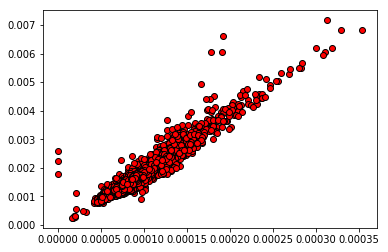

In [30]:
plt.plot(RMRMs.magn_mass_x,RMRMs.magn_mass_y,'ro',markeredgecolor='black');

## Problem 2b
For this problem we need to:
- Read in the specimen level data file
- This data set has duplicate information, so we will just look for the contribution by Tauxe and Yamazaki but filtering the citation key for 'Yamazaki'.  
- Pair the specimen with the site age (or height) information.  For these data the specimen name is the same as the site (one specimen per sedimentary horizon).  So, we just make a column named 'site' in the specimen table and merge it with the site table on site.  that will transfer all the info from the site table (including age and core_depth) to the specimen table. 
- make the plot.

In [31]:
import pandas as pd

In [32]:
specimens=pd.read_csv('Chapter_10/Myfiles2/specimens.txt',sep='\t',header=1)
specimens=specimens[specimens.citations.str.contains('Yamazaki')]
sites=pd.read_csv('Chapter_10/Myfiles2//sites.txt',sep='\t',header=1)
specimens['site']=specimens['specimen']
RPI=pd.merge(specimens,sites,on='site')
RPI.columns

Index(['analysts', 'citations_x', 'description', 'dir_dec', 'dir_inc',
       'dir_nrm_origin', 'dir_polarity', 'dir_tilt_correction',
       'geologic_classes_x', 'geologic_types_x', 'int_corr', 'int_rel',
       'lithologies_x', 'method_codes', 'result_quality', 'result_type',
       'sample', 'scientists', 'specimen', 'specimen_alternatives', 'volume',
       'weight', 'site', 'age', 'age_unit', 'citations_y', 'core_depth',
       'geologic_classes_y', 'geologic_types_y', 'lithologies_y', 'location'],
      dtype='object')

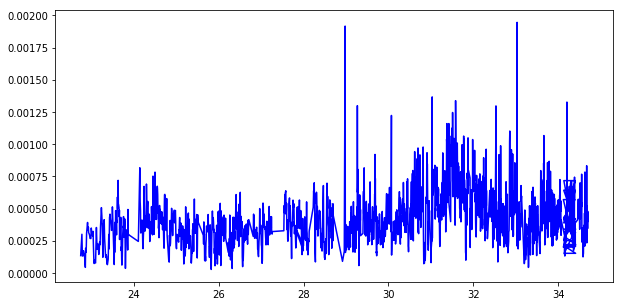

In [33]:
plt.figure(1,(10,5))
plt.plot(RPI.age,RPI.int_rel,'b-');

It looks like the age data are not in order, so we should sort by age

In [34]:
RPI=RPI.sort_values('age')

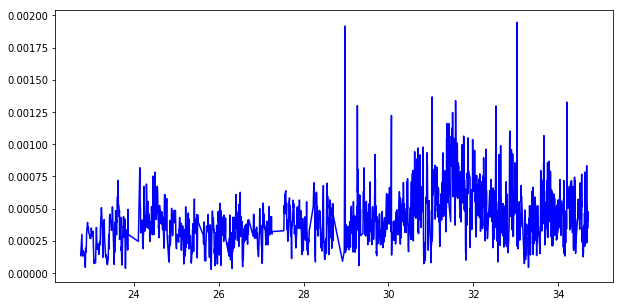

In [35]:
plt.figure(1,(10,5))
plt.plot(RPI.age,RPI.int_rel,'b-');

That's better!.  

The minimal criteria would be a linear relationship between IRM and ARM and a range in concentrations that does not exceed 10.  These data pass these minimal criteria.  But it would be nice to replicate the data somewhere else too.  And Yamazaki has done this recently....  